
# **Assignment - 3: Improving Graphs**

---
Course website: [SHALA-2020](https://shala2020.github.io/)

This assignment will get you familiarized with improving plots/graphs in Python. 

---
## Part 1 - Importing packages and loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

*You are free to use any other popular libraries*. 

In [0]:
# Load the libraries with their aliases 
## Created by Sreya Dhar
## Dated: 04/20/20
## SHALA2020/Assignment-3

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
from math import pi
from sklearn.impute import SimpleImputer


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```train``` and ```movies``` respectively. 
* Print the first ten rows of ```train``` and last ten rows of ```movies```. 

In [74]:
# Load train.csv and movies.csv 
url_train = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv"
train = pd.read_csv(url_train)

# Print the first ten rows of train
train.head(10)
train.shape

(1028, 34)

In [129]:
# Load movies.csv
url_movies = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/DataScience/L2/moviesData.csv"
movies = pd.read_csv(url_movies)

# Print the last ten rows of movies
movies.tail(10)

Unnamed: 0  ...            actor5
590         591  ...        Ben Vereen
591         592  ...       Bob Balaban
592         593  ...     George Gaynes
593         594  ...   Lance Henriksen
594         595  ...  Steve Guttenberg
595         596  ...       Jack Bailey
596         597  ...       Rachel True
597         598  ...    Randy McDowell
598         599  ...       Ian McNeice
599         600  ...    Adam G. Sevani

[10 rows x 31 columns]

---
## Part 2 - Drawing correlation and heatmap 
---

### Using the correlation matrix, peform the following:

* Find the correlation matrix for the ```movies```.  
* Draw a **heatmap** with the correlation matrix and display the values of correlation coefficients for each pair of features. Make sure the values are properly visible. You might want to adjust the figure size for this. 
* Create a ```mask``` to remove the duplicate values from the **heatmap**. 

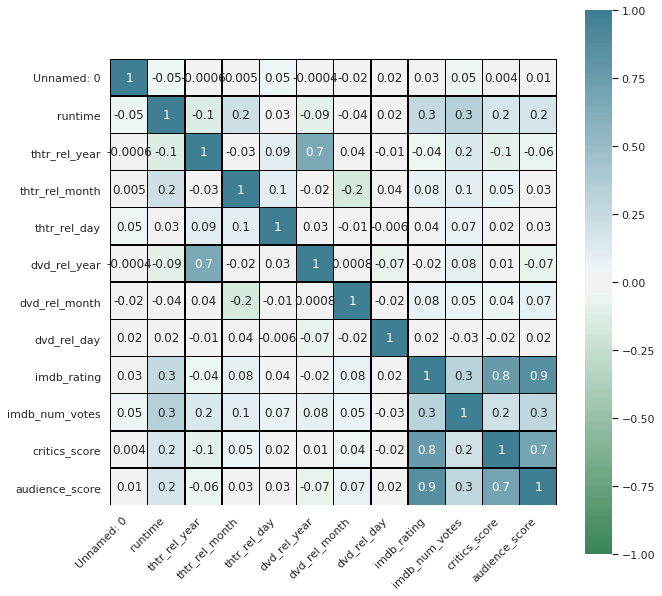

In [130]:
# Find out the correlation matrix 
corr = movies.corr(); corr
# Draw the heatmap
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(-220, 220, n=200),
    square=True, annot = True, fmt='.1g',
    linewidths=0.5, linecolor='black'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);ax

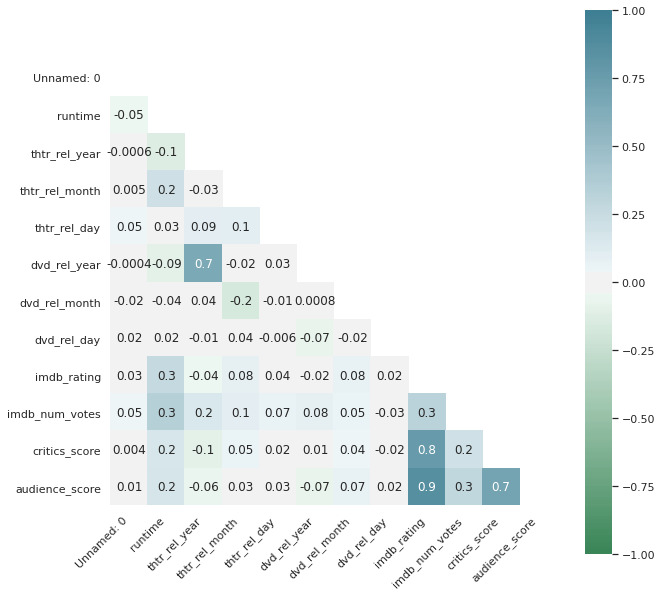

In [134]:
# Creating a mask for removing duplicates
fig, ax_1 = plt.subplots(figsize=(10,10))
matrix = np.triu(movies.corr())
ax_1= sns.heatmap(movies.corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(-220, 220, n=200),
    square=True, annot = True, fmt='.1g',
    mask=matrix)
ax_1.set_xticklabels(
    ax_1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
ax_1.set_facecolor('white');ax_1

---
## Part 3 - Drawing plots and customizing these 
---

### Using a histogram, peform the following:

* Draw a histogram of all the numeric features in ```train```. Please note that this can be done in a single command.  

* Find out whether there is any redundant features in ```train```, which can be dropped while building a model. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4546ba91d0>,
      dtype=object)

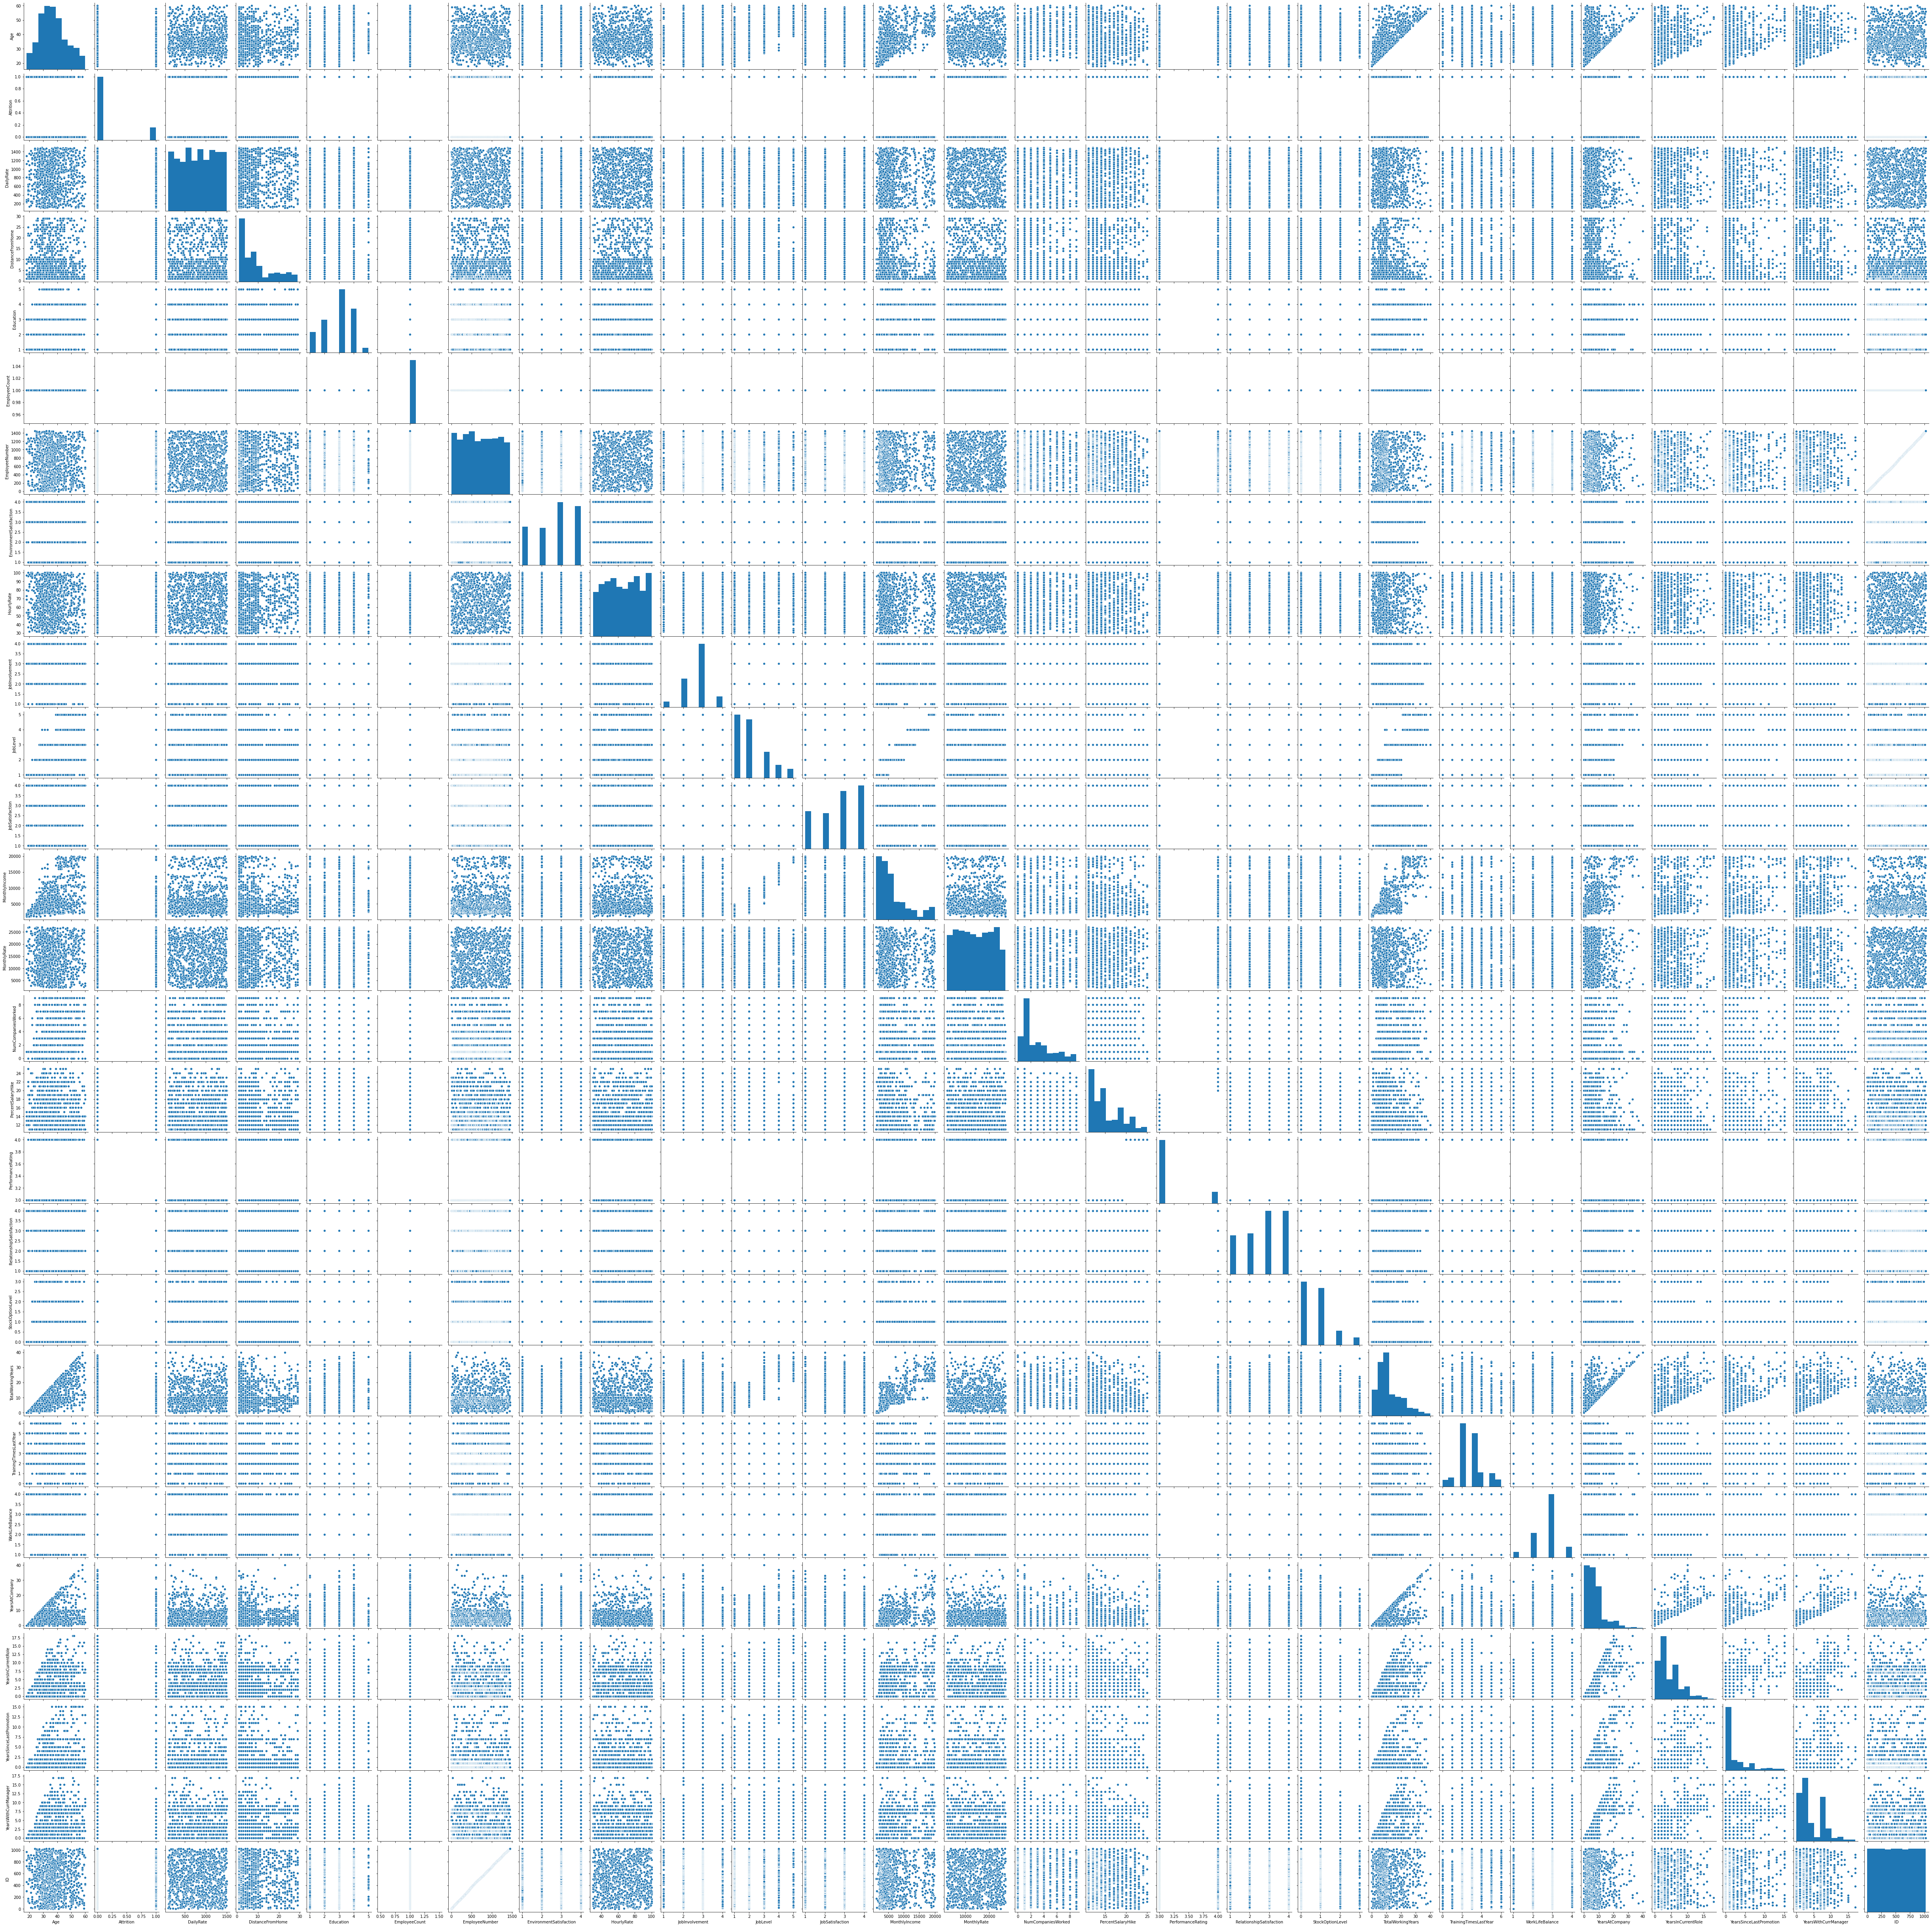

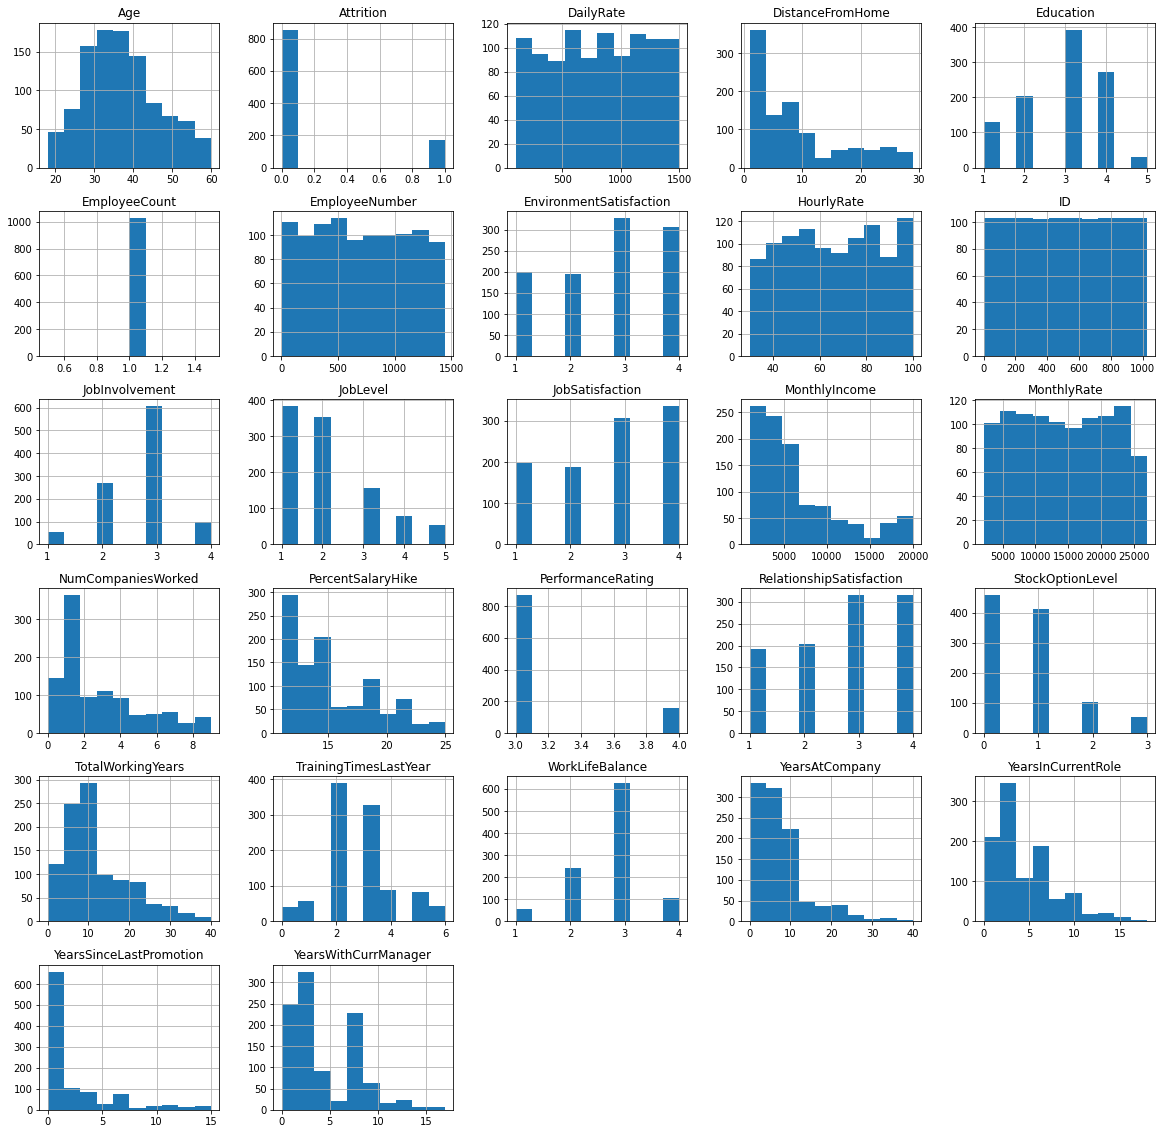

In [25]:
# Draw a histogram 
import seaborn as sns
sns.pairplot(train)
ax_2=pd.DataFrame.hist(train, figsize=(20,20));ax_2

### Using a scatter plot, perform the following:

* Draw a scatter plot between between ```imdb_rating``` and ```audience_score```, and also fit a regression line.
* Change the color of marker to red, size to 200, transparency to 0.3.    



Text(0.5, 1.0, 'Scatter Plots between imdb_rating and audience_score')

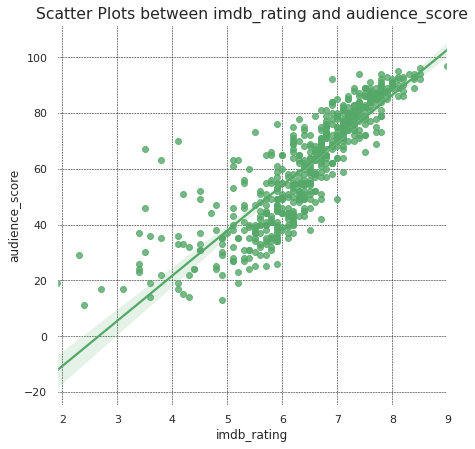

In [244]:
# Scatter plot to fit the regression line 
import seaborn as sns; sns.set(color_codes=True)
fig, ax_3 = plt.subplots(figsize=(7,7))
ax_3 = sns.regplot(x="imdb_rating", y="audience_score", data=movies,color="g")
sns.set(font_scale=1.3)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='black')
ax_3.set_facecolor('white')
ax_3.set_title('Scatter Plots between imdb_rating and audience_score')

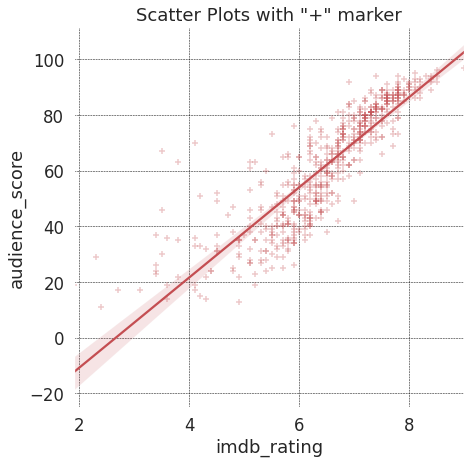

In [263]:
# Change marker of the scatter plot, Change the color of marker to red, size to 200, transparency to 0.3.
fig, ax_4 = plt.subplots(figsize=(7,7))
ax_4 = sns.regplot(x="imdb_rating", y="audience_score", data=movies, marker="+", color="r", scatter_kws={'alpha':0.3})
sns.set(font_scale=1.5)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='black')
ax_4.set_facecolor('white')
ax_4.set_title('Scatter Plots with "+" marker')
plt.show()

### Using a scatter plot, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw a scatter plot between between ```petal_length``` and ```petal_width``` and color it according to the ```species```.
* Change the size of marker to 100 and place the legend in ```lower right```. 

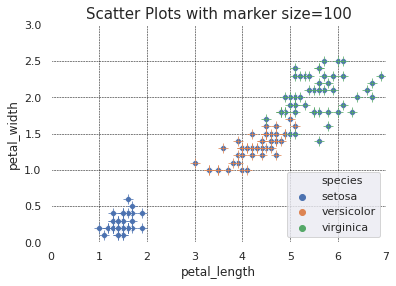

In [282]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
fig, ax_5 = plt.subplots(figsize=(6,4))
sns.set(font_scale=1.0)
ax_5 = sns.scatterplot(x="petal_length", y="petal_width", data=df)
sns.set(style="darkgrid")
# Use the 'hue' argument to provide a factor variable
# Move the legend to an empty part of the plot
ax_6 = sns.scatterplot(x="petal_length", y="petal_width", data=df, hue="species", marker="+", s= 100, color="g")
plt.grid(which='major', linestyle='--', linewidth='0.5', color='black')
plt.axis([0, 7, 0, 3])
ax_6.set_facecolor('white')
ax_6.set_title('Scatter Plots with marker size=100', fontsize=15)
ax_6.legend(loc='lower right', ncol=1)

---
## Part 4 - Density Plots  
---

### Using density plots, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw the density plots for all the features ```sepal_width```, ```sepal_length```, ```petal_width```, and ```petal_length```. You can required to use subplots for plotting all the density plots. 
* Try drawing a [CDF](https://en.wikipedia.org/wiki/Cumulative_distribution_function) of these features. There is a [blog on medium](https://medium.com/@rishav.jnit/exploratory-data-analysis-eda-on-iris-dataset-using-python-cadd850c1fc6) on how to plot CDF. It will be covered in tutorial. 

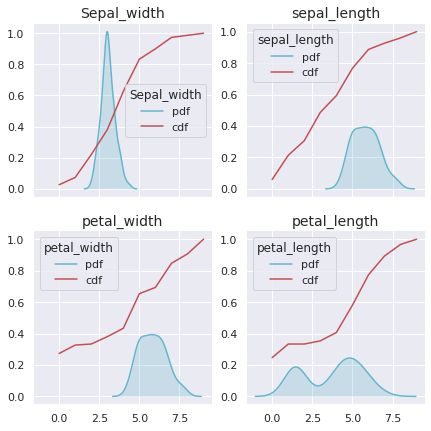

<Figure size 432x288 with 0 Axes>

In [290]:
# library and dataset 
import seaborn as sns
df = sns.load_dataset('iris')
df.head(5)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.set(font_scale=1.0)
# sepal_width, pdf, cdf
d1= sns.kdeplot(df['sepal_width'], color="c",ax=axes[0][0],shade=True)
counts_1, bin_edges_1 = np.histogram(df['sepal_width'], bins=10, density = True)
pdf_1 = counts_1/(sum(counts_1))
cdf_1 = np.cumsum(pdf_1)
axes[0][0].plot(cdf_1,color="r")
axes[0][0].legend(["pdf","cdf"],title="Sepal_width")
#d1.set_facecolor('#ffffe4')
d1.set_title('Sepal_width', fontsize=14)

# sepal_length, pdf, cdf
d2= sns.kdeplot(df['sepal_length'], color="c",ax=axes[0][1],shade=True)
counts_2, bin_edges_2 = np.histogram(df['sepal_length'], bins=10, density = True)
pdf_2 = counts_2/(sum(counts_2))
cdf_2 = np.cumsum(pdf_2)
axes[0][1].plot(cdf_2,color="r")
axes[0][1].legend(["pdf","cdf"],title="sepal_length")
#d2.set_facecolor('#ffffe4')
d2.set_title('sepal_length', fontsize=14)

# petal_width, pdf, cdf
d3= sns.kdeplot(df['sepal_length'], color="c",ax=axes[1][0],shade=True)
counts_3, bin_edges_3 = np.histogram(df['petal_width'], bins=10, density = True)
pdf_3 = counts_3/(sum(counts_3))
cdf_3 = np.cumsum(pdf_3)
axes[1][0].plot(cdf_3,color="r")
axes[1][0].legend(["pdf","cdf"],title="petal_width")
plt.figure(linewidth=10, )
#d3.set_facecolor('#ffffe4')
d3.set_title('petal_width', fontsize=14)

#petal_length, pdf, cdf
d4= sns.kdeplot(df['petal_length'], color="c",ax=axes[1][1],shade=True)
counts_4, bin_edges_4 = np.histogram(df['petal_length'], bins=10, density = True)
pdf_4 = counts_4/(sum(counts_4))
cdf_4 = np.cumsum(pdf_4)
axes[1][1].plot(cdf_4,color="r")
axes[1][1].legend(["pdf","cdf"],title="petal_length")
#d4.set_facecolor('#ffffe4')
d4.set_title('petal_length', fontsize=14) 
fit_reg=False

### Using violin plot, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw the density plots of ```species``` versus ```sepal_length```.
* Assign each group a color like 

    * versicolor - green, 
    * setosa - blue,   
    * virginica - m

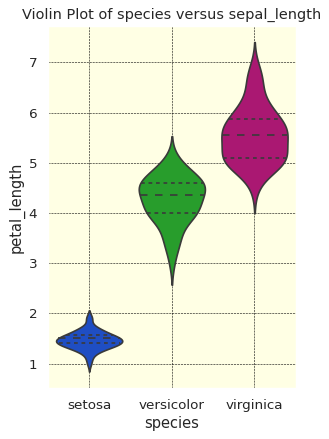

In [293]:
# Draw the normal violin plots 
import seaborn as sns
df = sns.load_dataset('iris')
plt.figure(figsize=(4,6), dpi= 80)
sns.set(font_scale=1.1)
# https://xkcd.com/color/rgb/
v1=sns.violinplot(x="species",y="petal_length", data=df, size=8, scale='width', inner='quartile', palette=['#0343df', '#15b01a', '#c20078'])
plt.grid(which='major', linestyle='--', linewidth='0.5', color='black')
v1.set_facecolor('#ffffe4')
#v1.set_edgecolor('black')
plt.title('Violin Plot of species versus sepal_length', fontsize=13)
plt.show()